In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('./Resouces/loans_data_encoded.csv')
df.head()


,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [3]:

y = df['bad']     # alternatively add '.values' to change it to an array

df_2 = df.copy()
X = df_2.drop('bad', axis = 1)

In [4]:
# seperate and split frist
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


In [5]:
# standardized X_train and X_test, the results would be ndarray
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)
# transform on both X sets
X_scalered_train = X_scaler.transform(X_train)
X_scalered_test = X_scaler.transform(X_test)

# check if standardized successfully
import numpy as np
X_scalered_train[:5]
print(np.mean(X_scalered_train[:,0]))
print(np.mean(X_scalered_train[:,0]))

-4.1211478674085813e-16
-4.1211478674085813e-16


In [6]:
DT_model = tree.DecisionTreeClassifier()

DT_model.fit(X_scalered_train, y_train)

y_pred = DT_model.predict(X_scalered_test)


[Text(46.524651227678575, 211.04470588235293, 'X[1] <= -1.476\ngini = 0.468\nsamples = 375\nvalue = [235, 140]'),
 Text(3.9857142857142858, 198.25411764705882, 'X[4] <= 1.062\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(1.9928571428571429, 185.4635294117647, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(5.978571428571429, 185.4635294117647, 'X[0] <= -0.377\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(3.9857142857142858, 172.6729411764706, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(7.9714285714285715, 172.6729411764706, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(89.06358816964286, 198.25411764705882, 'X[9] <= -0.999\ngini = 0.476\nsamples = 357\nvalue = [218, 139]'),
 Text(20.925, 185.4635294117647, 'X[3] <= -0.606\ngini = 0.385\nsamples = 50\nvalue = [37, 13]'),
 Text(11.957142857142857, 172.6729411764706, 'X[3] <= -1.515\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(9.964285714285715, 159.88235294117646, 'gini = 0.0\nsamples = 3\nvalue = [3, 0

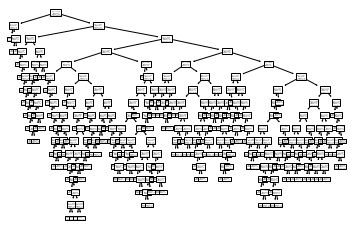

In [7]:
# visualize
tree.plot_tree(DT_model)

# the root mode is X[1], column 2: term

In [8]:
# evaluate
acc_score = accuracy_score(y_test,y_pred)

cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actually good(0)', 'actually bad(1)'], 
                                       columns=["Predicted good", "Predicted bad"])

report = classification_report(y_test, y_pred)


In [9]:
# Displaying results
print("Confusion Matrix")
print(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(report)


Confusion Matrix
                  Predicted good  Predicted bad
actually good(0)              38             27
actually bad(1)               37             23
Accuracy Score : 0.488
Classification Report
              precision    recall  f1-score   support

           0       0.51      0.58      0.54        65
           1       0.46      0.38      0.42        60

    accuracy                           0.49       125
   macro avg       0.48      0.48      0.48       125
weighted avg       0.48      0.49      0.48       125



In [10]:
from sklearn.metrics import precision_recall_fscore_support
summary = precision_recall_fscore_support(y_test,y_pred)
summary


(array([0.50666667, 0.46      ]),
 array([0.58461538, 0.38333333]),
 array([0.54285714, 0.41818182]),
 array([65, 60], dtype=int64))

In [11]:
# rank the importance of features
importance = DT_model.feature_importances_

# combine with column name by using zip(), list function: sorted()
sorted(zip(importance, X.columns), reverse=True)

[(0.42627939976590434, 'age'),
 (0.320685886254388, 'month_num'),
 (0.08486132454625099, 'term'),
 (0.047362028054379286, 'education_High School or Below'),
 (0.04336007405278836, 'amount'),
 (0.03487745095751082, 'education_Bachelor'),
 (0.030164309970969475, 'education_college'),
 (0.012409526397808861, 'gender_male'),
 (0.0, 'gender_female'),
 (0.0, 'education_Master or Above')]

 In summary, this model may not be the best one for preventing fraudulent loan applications because the model's accuracy, 0.5, is low, and the precision and recall are not good enough to state that the model will be good at classifying fraudulent loan applications. Modeling is an iterative process: you may need more data, more cleaning, another model parameter, or a different model. It’s also important to have a goal that’s been agreed upon, so that you know when the model is good enough.